In [29]:
import commonFunctions as cf
from BacktestPlatform import TradeBlotter, Details
import numpy as np
import pandas as pd
import scipy as sp
from datetime import datetime, date, timedelta
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools
%matplotlib inline

In [30]:
df_btc = pd.read_csv('data/btc_data.csv', index_col=0)
df_bch = pd.read_csv('data/bch_data.csv', index_col=0)
df_ltc = pd.read_csv('data/ltc_data.csv', index_col=0)
df_eth = pd.read_csv('data/eth_data.csv', index_col=0)

In [31]:
def get_ret(dat):
    return np.log(dat/dat.shift(1))[1:]

def isNaN(num):
    return num != num

def firstNonNanIndex(data):
    for i in range(len(data)):
        if not isNaN(data[i]):
            return i
    return -1

def getPriceAroundHalving(dat, halvingDate, window):
    index = 0
    for i in dat.index:
        if i == halvingDate:
            break
        index += 1
    dat[index:index+180].plot()
    return dat[index-window:index+window]
    

In [32]:
btc_ret = get_ret(df_btc['Adj Close'])[:-2]
bch_ret = get_ret(df_bch['Adj Close'])[:-2]
ltc_ret = get_ret(df_ltc['Adj Close'])[:-2]
eth_ret = get_ret(df_eth['Adj Close'])[:-2]

In [33]:
bch_start = firstNonNanIndex(bch_ret)
eth_start = firstNonNanIndex(eth_ret)
ltc_start = firstNonNanIndex(ltc_ret)

rets = [btc_ret, bch_ret, ltc_ret, eth_ret]
keys = ['btc', 'bch', 'ltc', 'eth']
ret_dict = dict(zip(keys, rets))

In [34]:
for key, ret in ret_dict.items():
    start = firstNonNanIndex(ret)
    print(key, np.corrcoef(btc_ret[start:], ret[start:])[0][1])

btc 0.9999999999999999
bch 0.4900338317905667
ltc 0.3726318617916427
eth 0.37025842306285983


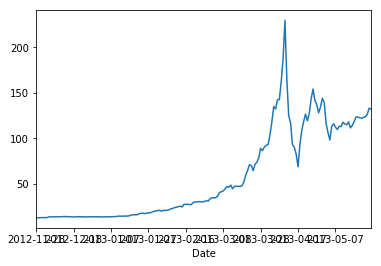

In [45]:
btc_1hdate = '2012-11-28'
btc_2hdate = '2016-07-09'
ltc_1hdate = '2015-08-25'
window = 150
btc_1h = getPriceAroundHalving(df_btc['Adj Close'], btc_1hdate, window)

In [46]:
btc_1h[window:].mean() / btc_1h[:window].mean()

4.181757352527341

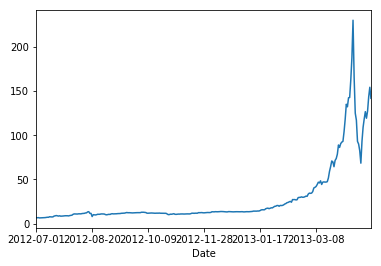

In [47]:
btc_1h.plot()

In [38]:
# the decline in second half is earlier than the first. reason for that could be the reward is 
# so little that many miner decided to close their business before halving and sell off their stockpile early
# which leads to a decline in 06/2016

# once the sell off of exiting miners finished, the price starts climb for a long times

# first entry, 3-6 months before halving, first exit, price doubled or big drop
# second entry, trough, hold for a while
# TODO:
# 1. when the rally ends for second entry
# 2. do same analysis for ltc

In [58]:
beg = 0
for i in range(df_btc.shape[0]):
    if df_btc.index[i] == btc_2hdate:
        beg = i
        break

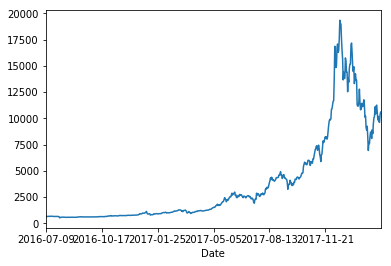

In [63]:
df_btc['Adj Close'][beg:beg+600].plot()